In [21]:
%matplotlib inline

import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import random
from scipy.spatial.distance import cosine
from numpy import linalg as LA

In [2]:
df = pd.read_csv("n2vecsent_init_rawclusterData_2.csv", header=None)
print(df.shape)

(22374, 602)


In [45]:
df.reindex(np.random.permutation(df.index))
dfm = df

dfm = dfm[(dfm[601] == 'comp.graphics') | (dfm[601] == 'rec.sport.baseball') | (dfm[601] == 'talk.politics.guns')]

n_sample = 1000

rows = np.random.choice(dfm.index.values, n_sample)
df_ = dfm.ix[rows]

df_ = df_.sort_values(by=601)
df_.index = range(0, df_.shape[0])
print(df_.shape)

(1000, 602)


In [46]:
df_.groupby(601).count()

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
601,,,,,,,,,,,,,,,,,,,,,
comp.graphics,395,395,395,395,395,395,395,395,395,395,...,395,395,395,395,395,395,395,395,395,395
rec.sport.baseball,299,299,299,299,299,299,299,299,299,299,...,299,299,299,299,299,299,299,299,299,299
talk.politics.guns,306,306,306,306,306,306,306,306,306,306,...,306,306,306,306,306,306,306,306,306,306


In [ ]:
L = LA.norm(df_[df_.columns[1:601]], axis = 1)
m = np.zeros(shape=(df_.shape[0], df_.shape[0]))
for i in df_.index:
    for j in df_.index:
        m[i][j] = df_.ix[i][1:601].dot(df_.ix[j][1:601])/(L[i]*L[j])
        if m[i][j] < 0:
            m[i][j] = 0

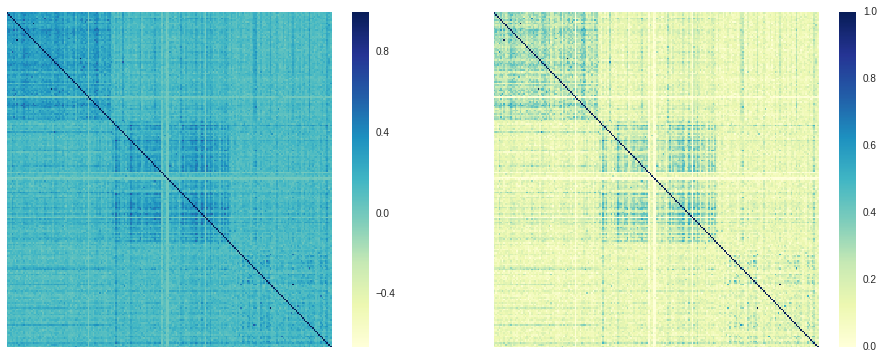

In [44]:
plt.rcParams['figure.figsize']=(16,6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.heatmap(m, cmap="YlGnBu", center = m.mean(), xticklabels=False, yticklabels=False, ax=ax1)
sns.heatmap(m, cmap="YlGnBu", xticklabels=False, yticklabels=False, ax=ax2)